In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.metrics import confusion_matrix, classification_report, f1_score


# Importing all the data set files

cedata = pd.read_csv('CE.csv')
cpdata = pd.read_csv('CP.csv')
eps1data = pd.read_csv('EPS1.csv')
fs1data = pd.read_csv('FS1.csv')
fs2data = pd.read_csv('FS2.csv')
ps1data = pd.read_csv('PS1.csv')
ps2data = pd.read_csv('PS2.csv')
ps3data = pd.read_csv('PS3.csv')
ps4data = pd.read_csv('PS4.csv')
ps5data = pd.read_csv('PS5.csv')
ps6data = pd.read_csv('PS6.csv') 
sedata = pd.read_csv('SE.csv')
ts1data = pd.read_csv('TS1.csv')
ts2data = pd.read_csv('TS2.csv')
ts3data = pd.read_csv('TS3.csv')
ts4data = pd.read_csv('TS4.csv') 
vs1data = pd.read_csv('VS1.csv') 


In [2]:
#Importing label data from profile file 

profile = pd.read_csv('Profile.csv') 
Y= pd.DataFrame(profile)

In [3]:
y_coolerCondition = pd.DataFrame(profile.iloc[:, 0])
y_valveCondition = pd.DataFrame(profile.iloc[:, 1])
y_pumpLeak = pd.DataFrame(profile.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(profile.iloc[:, 3])
y_stableFlag = pd.DataFrame(profile.iloc[:, 4])

In [4]:
def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1 

PS1 = pd.DataFrame(mean_conversion(ps1data))
PS1.columns = ['PS1'] 

PS2 = pd.DataFrame(mean_conversion(ps2data))
PS2.columns = ['PS2']

PS3 = pd.DataFrame(mean_conversion(ps3data))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(ps4data))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(ps5data))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(ps6data))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(fs1data))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(fs2data))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(ts1data))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(ts2data))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(ts3data))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(ts4data))
TS4.columns = ['TS4']

EPS1 = pd.DataFrame(mean_conversion(eps1data))
EPS1.columns = ['EPS1']

VS1 = pd.DataFrame(mean_conversion(vs1data))
VS1.columns = ['VS1']

CE = pd.DataFrame(mean_conversion(cedata))
CE.columns = ['CE']

CP = pd.DataFrame(mean_conversion(cpdata))
CP.columns = ['CP']

SE = pd.DataFrame(mean_conversion(sedata))
SE.columns = ['SE']


In [46]:
X = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, EPS1, VS1, CE, CP, SE], axis=1)

In [49]:
X[np.isnan(X)] = 0

In [52]:
#SVM CODE  Classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

scaler = StandardScaler()  
scaler.fit(X)

X_normalize = scaler.transform(X)  



def predict_pump_performance(X, y, predictType):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

    svc = SVC(C=1000, kernel='linear', gamma=0.001,decision_function_shape='ovr')
    svc.fit(X_train, y_train.values.ravel())


    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("{0} Accuracy is: {1: .2f}%".format(predictType, accuracy))


predict_pump_performance(X_normalize, y_coolerCondition, 'cooling failure')
predict_pump_performance(X_normalize, y_valveCondition, 'valve condition')
predict_pump_performance(X_normalize, y_pumpLeak, 'pump leaks')
predict_pump_performance(X_normalize, y_hydraulicAcc, 'hydraulic accumulator condition')
predict_pump_performance(X_normalize, y_stableFlag, 'stable flag')



cooling failure Accuracy is:  100.00%
valve condition Accuracy is:  93.42%
pump leaks Accuracy is:  98.41%
hydraulic accumulator condition Accuracy is:  78.46%
stable flag Accuracy is:  90.93%


  Cooling failure MSE : 4.740937095744569
  Cooling failure MAE  : 1.2356290922800153
Root Mean Squared Error, RMSE = 2.177369306237362
 Cooling failure R2 Score : 0.9974057344165288


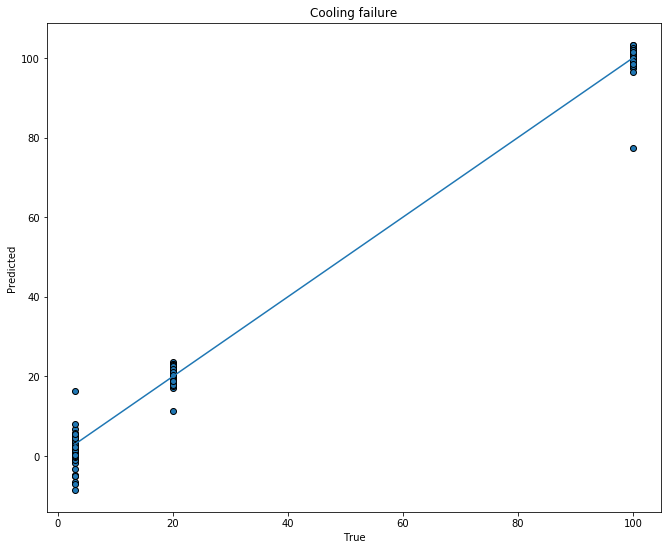

  Valve condition MSE : 18.466059416482857
  Valve condition MAE  : 2.326568099148782
Root Mean Squared Error, RMSE = 4.297215309532774
 Valve condition R2 Score : 0.839852516823813


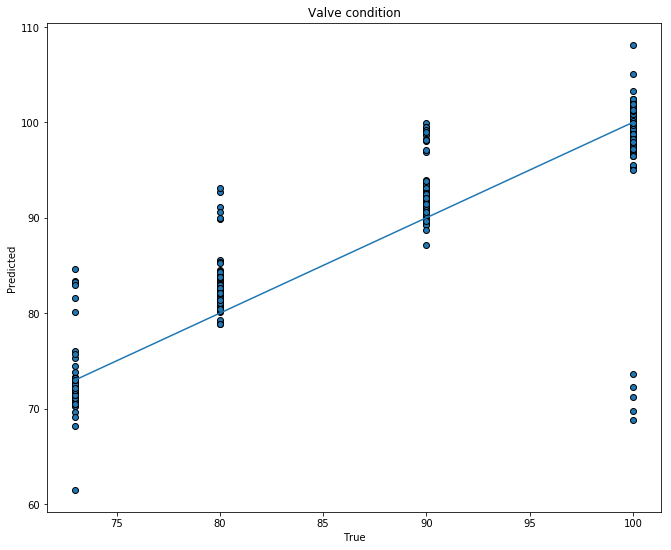

  Pump leaks MSE : 0.05366580658508342
  Pump leaks MAE  : 0.12523472475761227
Root Mean Squared Error, RMSE = 0.2316588150385895
 Pump leaks R2 Score : 0.9192784020350698


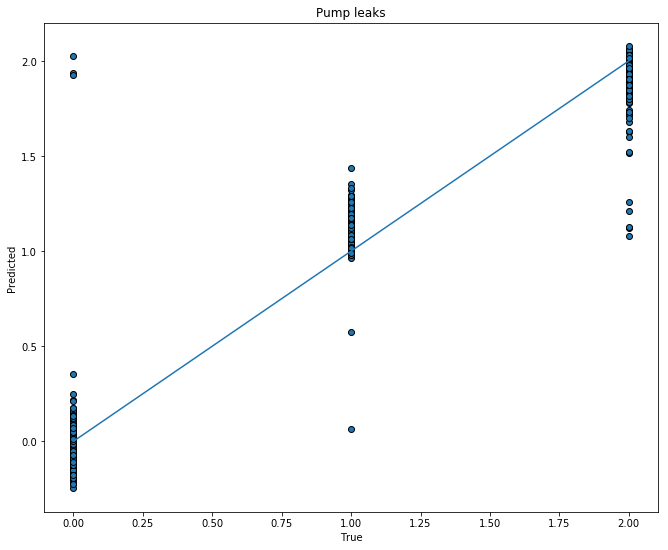

  Hydraulic accumulator condition MSE : 123.27031631908777
  Hydraulic accumulator condition MAE  : 8.726843230410893
Root Mean Squared Error, RMSE = 11.102716618877011
 Hydraulic accumulator condition R2 Score : 0.5408364134882951


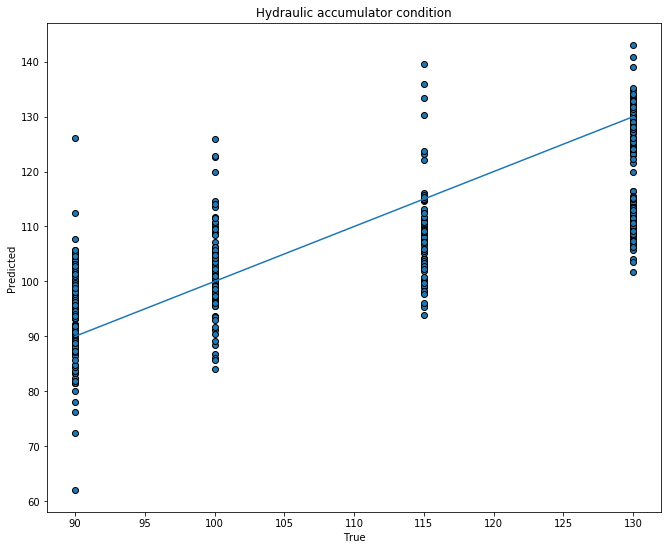

  Stable flag MSE : 0.09672610611095446
  Stable flag MAE  : 0.23259306634839874
Root Mean Squared Error, RMSE = 0.31100820907325655
 Stable flag R2 Score : 0.5367793685652665


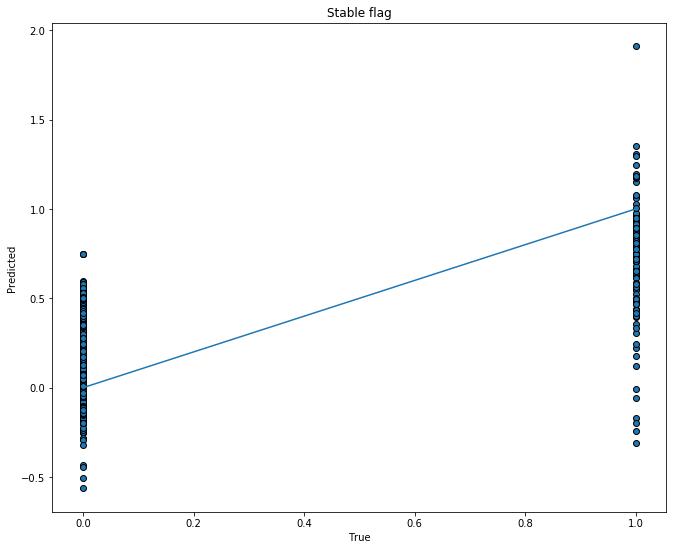

In [71]:
#SVM Code Regression

from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


scaler = StandardScaler()  
scaler.fit(X)

X_normalize = scaler.transform(X)  


def predict_pump_performance(X, y, predictType):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

    svr = svm.SVR(C=1000,kernel='linear',gamma=0.2)
    svr.fit(X_train, y_train.values.ravel())


    y_pred = svr.predict(X_test)
    
    
    
    mse=mean_squared_error(y_test,y_pred)
    print( "  {0} MSE :".format(predictType,mse) , mse)
    
    mae=mean_absolute_error(y_test,y_pred)
    print( "  {0} MAE  :".format(predictType,mae) , mae)
    
    score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error, RMSE =', score_rmse)
  
    r2score=r2_score(y_test,y_pred)
    print( " {0} R2 Score :".format(predictType,r2score) , r2score)
    
    
    fig, ax = plt.subplots(figsize=(11, 9))
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()])
    plt.title(predictType)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    plt.show()
  
   
    
    

predict_pump_performance(X_normalize, y_coolerCondition, 'Cooling failure')
predict_pump_performance(X_normalize, y_valveCondition, 'Valve condition')
predict_pump_performance(X_normalize, y_pumpLeak, 'Pump leaks')
predict_pump_performance(X_normalize, y_hydraulicAcc, 'Hydraulic accumulator condition')
predict_pump_performance(X_normalize, y_stableFlag, 'Stable flag')
